In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/cleaned_data.csv')

In [ ]:
'''
    Question: Is Netflix increasingly focusing on TV rather than movies in recent years?
'''

In [3]:
df.columns

Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'age_rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

In [4]:
df[['date_added', 'release_year']]

,date_added,release_year
0,2020-08-14 00:00:00,2020
1,2016-12-23 00:00:00,2016
2,2018-12-20 00:00:00,2011
3,2017-11-16 00:00:00,2009
4,2020-01-01 00:00:00,2008
...,...,...
7782,2020-10-19 00:00:00,2005
7783,2019-03-02 00:00:00,2015
7784,2020-09-25 00:00:00,2019
7785,2020-10-31 00:00:00,2019


In [5]:
type_and_date = df[['type', 'date_added']]
type_and_date

,type,date_added
0,TV Show,2020-08-14 00:00:00
1,Movie,2016-12-23 00:00:00
2,Movie,2018-12-20 00:00:00
3,Movie,2017-11-16 00:00:00
4,Movie,2020-01-01 00:00:00
...,...,...
7782,Movie,2020-10-19 00:00:00
7783,Movie,2019-03-02 00:00:00
7784,Movie,2020-09-25 00:00:00
7785,TV Show,2020-10-31 00:00:00


In [6]:
type_and_date.iloc[0, 1][0:4]

'2020'

In [7]:
type_and_date['year_added'] = type_and_date['date_added'].apply(lambda x: x[0:4])
type_and_date

<ipython-input-7-b80ff714f64e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_and_date['year_added'] = type_and_date['date_added'].apply(lambda x: x[0:4])


,type,date_added,year_added
0,TV Show,2020-08-14 00:00:00,2020
1,Movie,2016-12-23 00:00:00,2016
2,Movie,2018-12-20 00:00:00,2018
3,Movie,2017-11-16 00:00:00,2017
4,Movie,2020-01-01 00:00:00,2020
...,...,...,...
7782,Movie,2020-10-19 00:00:00,2020
7783,Movie,2019-03-02 00:00:00,2019
7784,Movie,2020-09-25 00:00:00,2020
7785,TV Show,2020-10-31 00:00:00,2020


In [8]:
movies = type_and_date[type_and_date.type == 'Movie']
shows = type_and_date[type_and_date.type == 'TV Show']

In [9]:
movies = movies['year_added'].value_counts().reset_index()
shows = shows['year_added'].value_counts().reset_index()

In [10]:
movies

,index,year_added
0,2019,1497
1,2020,1312
2,2018,1255
3,2017,864
4,2016,258
5,2021,88
6,2015,58
7,2014,19
8,2011,13
9,2013,6


In [13]:
shows = shows[shows['index'] != 'Unkn']
shows

,index,year_added
0,2020,697
1,2019,656
2,2018,430
3,2017,361
4,2016,185
5,2015,30
6,2021,29
8,2014,6
9,2013,5
10,2008,1


In [15]:
movies = movies.sort_values('index', ascending=True)
shows = shows.sort_values('index', ascending=True)

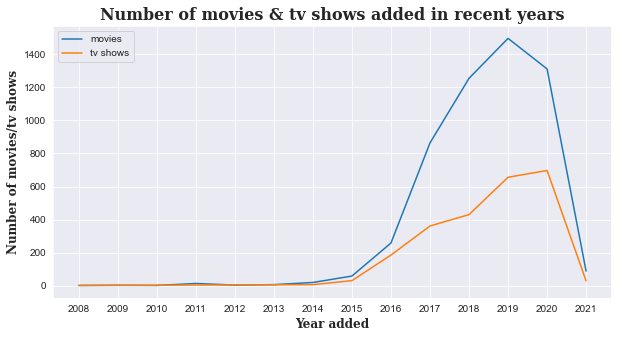

In [23]:
fontdict = {'family': 'serif',
            'weight': 'bold',
            'size': 16 
            }

fontdict_smaller = {'family': 'serif',
                    'weight': 'bold',
                    'size': 12 
                    }

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.lineplot(data=movies, x='index', y='year_added', label='movies')
sns.lineplot(data=shows, x='index', y='year_added', label='tv shows')
plt.title('Number of movies & tv shows added in recent years', fontdict=fontdict)
plt.xlabel('Year added', fontdict=fontdict_smaller)
plt.ylabel('Number of movies/tv shows', fontdict=fontdict_smaller)
plt.rcParams['savefig.facecolor'] = 'white'
plt.savefig('../Graphs/movies_shows_in_recent_years.png', dpi = 800)
plt.show()

In [ ]:
'''
   Observation: Netflix is absolutely not increasingly focusing on TV shows rather than movies in recent years. Although, there is small change if we compare only past two years           (2019 & 2020). Between those two years number of movies went down and number of tv shows went up, so there is a chance that Netflix will focus more on tv shows in next years.
'''